In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'maize-disease:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4699436%2F7983833%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240518%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240518T165516Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D506279ab52e19073d2182ca32f8f99145617cbfd1febba2e45701a3f3f172d574dff5a4379af869c949347470ecde20e36a38267bc89465a0afb65591be9a6c317e2dd86247bd50655490de83e870fe056c1b7eff2c6f0fa5bcd473a3a4b1407efb9c90654e1b24de9a4d48603a825a587c179c018fe08075978617cbc04d7774445d3bcadd1a66846885a78e8b4c8ea505fc21b8adb3d7bede84a6d86b0798a28d568c7939c75d9461e82f326c0963196b6e863e44bddadeff12f8d04833e6ce7e8fcd2b5ae86af994e37e883c9bd37eaf0f70314544c72d140aa3d2d117f0ab787cf5b5a0c9373da947c5b058533d70406fbe15f0f4b1b9f351b36ef2d1e58'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


In [ ]:
import cv2
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#Matplot Images
import matplotlib.image as mpimg
# Tensflor and Keras Layer and Model and Optimize and Loss
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import *
from tensorflow.keras.losses import BinaryCrossentropy
#Kernel Intilizer
from sklearn.preprocessing import LabelEncoder
# import tensorflow_hub as hub
from tensorflow.keras.optimizers import Adam , Adamax
#PreTrained Model
from tensorflow.keras.applications import *
#Early Stopping
from tensorflow.keras.callbacks import EarlyStopping
# Warnings Remove
import warnings
warnings.filterwarnings("ignore")

2024-05-18 16:21:38.053208: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-18 16:21:38.053311: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-18 16:21:38.173570: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [ ]:
directory = "/kaggle/input/maize-disease"

filepath =[]
label = []

folds = os.listdir(directory)

for fold in folds:
    f_path = os.path.join(directory , fold)

    imgs = os.listdir(f_path)

    for img in imgs:

        img_path = os.path.join(f_path , img)
        filepath.append(img_path)
        label.append(fold)

#Concat data paths with labels
file_path_series = pd.Series(filepath , name= 'filepath')
Label_path_series = pd.Series(label , name = 'label')
df_test = pd.concat([file_path_series ,Label_path_series ] , axis = 1)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
#Data_Dir
data_dir = '/kaggle/input/maize-disease/Model'
test_dir = '/kaggle/input/maize-disease/Model'

img_width, img_height = 224, 224  # Dimensions of input images
batch_size = 32  # Batch size for training and validation

# Step 3: Define image data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)  # 80% for training, 20% for validation

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')  # Set as training data

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')  # Set as validation data

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False)  # Set shuffle to False for test data


Found 12280 images belonging to 4 classes.
Found 3069 images belonging to 4 classes.
Found 15349 images belonging to 4 classes.


In [ ]:
# Display each folder name

a=0
for class_name in os.listdir(data_dir):
    a=a+1
    print(a,class_name)


1 MLN
2 HEATHLY
3 MSV_2
4 MSV_1


In [ ]:
def visualize_images(path, num_images):
    # Get a list of image filenames in the specified path
    image_filenames = os.listdir(path)

    # Limit the number of images to visualize if there are more than num_images
    num_images = min(num_images, len(image_filenames))

    # Create a figure and axis object to display images
    fig, axes = plt.subplots(1, num_images, figsize=(15, 3),facecolor='white')

    # Iterate over the selected images and display them
    for i, image_filename in enumerate(image_filenames[:num_images]):
        # Load the image using Matplotlib
        image_path = os.path.join(path, image_filename)
        image = mpimg.imread(image_path)

        # Display the image
        axes[i].imshow(image)
        axes[i].axis('off')  # Turn off axis
        axes[i].set_title(image_filename)  # Set image filename as title

    # Adjust layout and display the figure
    plt.tight_layout()
    plt.show()

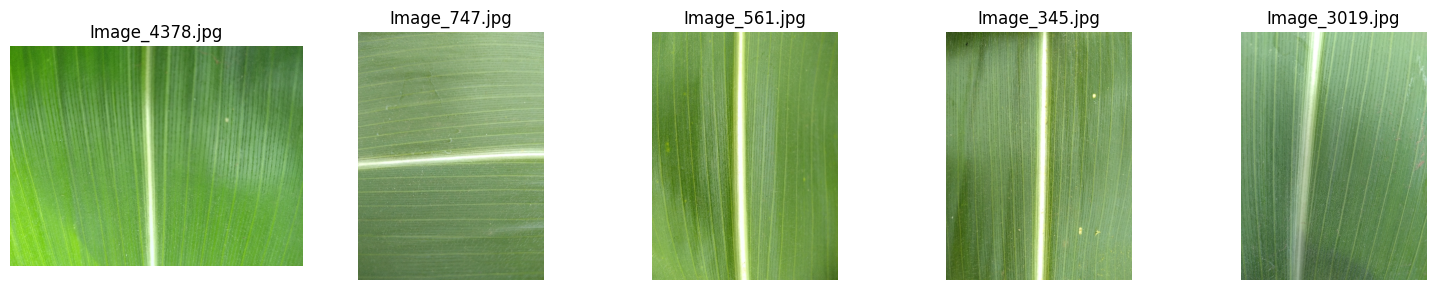

In [ ]:
path_to_visualize = "/kaggle/input/maize-disease/Model/HEATHLY"

# Visualize some images from the specified path
visualize_images(path_to_visualize, num_images=5)

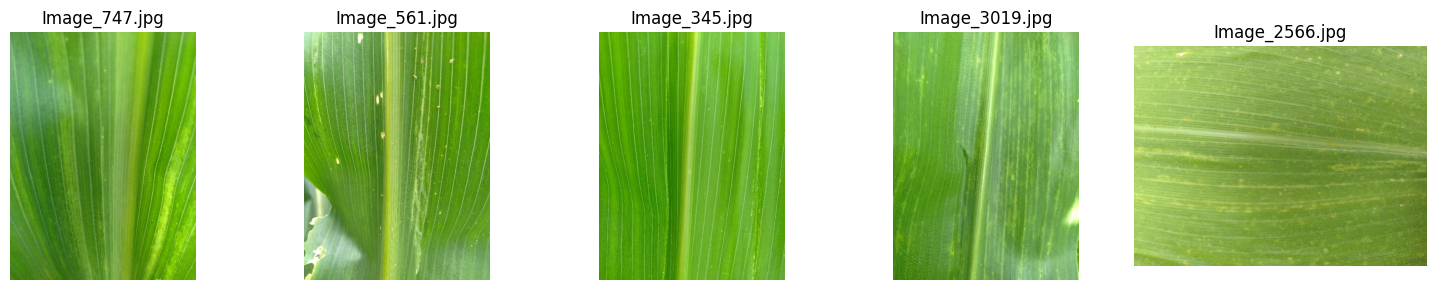

In [ ]:
path_to_visualize = "/kaggle/input/maize-disease/Model/MLN"

# Visualize some images from the specified path
visualize_images(path_to_visualize, num_images=5)

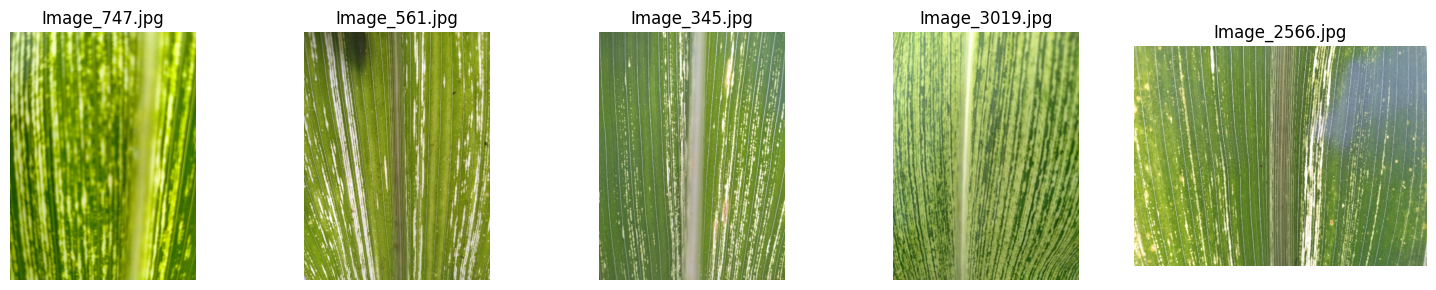

In [ ]:
path_to_visualize = "/kaggle/input/maize-disease/Model/MSV_1"

# Visualize some images from the specified path
visualize_images(path_to_visualize, num_images=5)

In [ ]:
import os

# Define dataset path
dataset_path = "/kaggle/input/maize-disease/Model"

# Count the number of images per class
image_counts = {}
for class_name in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_name)
    # Ensure the path is a directory to avoid file counting
    if os.path.isdir(class_path):
        image_counts[class_name] = len(os.listdir(class_path))

print(image_counts)


{'MLN': 3980, 'HEATHLY': 5117, 'MSV_2': 3095, 'MSV_1': 3157}


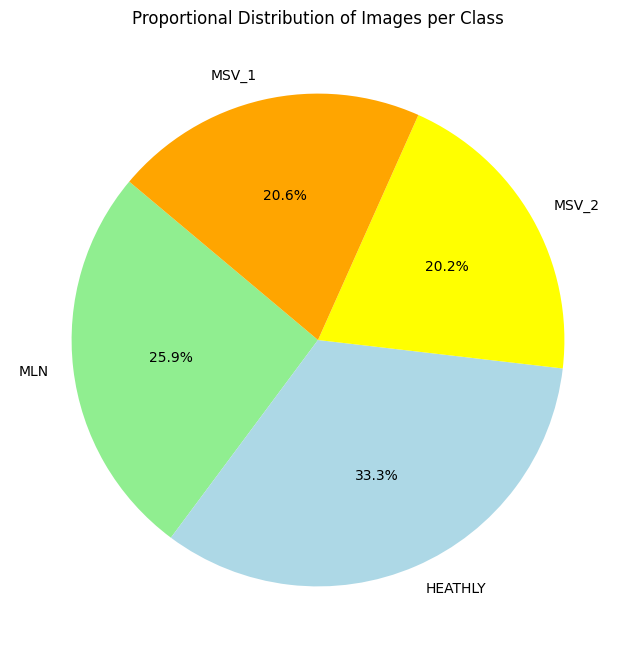

In [ ]:
# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=classes, autopct='%1.1f%%', startangle=140, colors=['lightgreen', 'lightblue', 'yellow', 'orange'])
plt.title('Proportional Distribution of Images per Class')
plt.show()

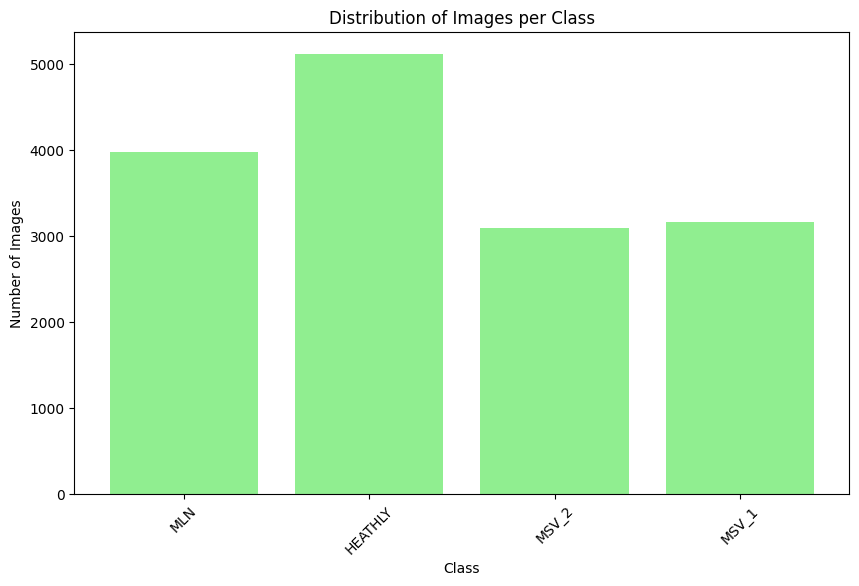

In [ ]:
import matplotlib.pyplot as plt

# Data
classes = list(image_counts.keys())
counts = list(image_counts.values())

# Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(classes, counts, color='lightgreen')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Distribution of Images per Class')
plt.xticks(rotation=45) # Rotate class names for better readability
plt.show()


In [ ]:
from tensorflow.keras import layers
def entry_flow(inputs):

    x = layers.Conv2D(32, 3, strides=2, padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    x = layers.Conv2D(64, 3, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    previous_block_activation = x  # Set aside residual

    # Blocks 1, 2, 3 are identical apart from the feature depth.
    for size in [128, 256, 728]:
        x = layers.Activation('relu')(x)
        x = layers.SeparableConv2D(size, 3, padding='same')(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation('relu')(x)
        x = layers.SeparableConv2D(size, 3, padding='same')(x)
        x = layers.BatchNormalization()(x)

        x = layers.MaxPooling2D(3, strides=2, padding='same')(x)

        residual = layers.Conv2D(  # Project residual
            size, 1, strides=2, padding='same')(previous_block_activation)
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    return x


def middle_flow(x, num_blocks=8):

    previous_block_activation = x

    for _ in range(num_blocks):
        x = layers.Activation('relu')(x)
        x = layers.SeparableConv2D(728, 3, padding='same')(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation('relu')(x)
        x = layers.SeparableConv2D(728, 3, padding='same')(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation('relu')(x)
        x = layers.SeparableConv2D(728, 3, padding='same')(x)
        x = layers.BatchNormalization()(x)

        x = layers.add([x, previous_block_activation])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    return x


def exit_flow(x, num_classes=1000):

    previous_block_activation = x

    x = layers.Activation('relu')(x)
    x = layers.SeparableConv2D(728, 3, padding='same')(x)
    x = layers.BatchNormalization()(x)

    x = layers.Activation('relu')(x)
    x = layers.SeparableConv2D(1024, 3, padding='same')(x)
    x = layers.BatchNormalization()(x)

    x = layers.MaxPooling2D(3, strides=2, padding='same')(x)

    residual = layers.Conv2D(  # Project residual
      1024, 1, strides=2, padding='same')(previous_block_activation)
    x = layers.add([x, residual])  # Add back residual

    x = layers.SeparableConv2D(1536, 3, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    x = layers.SeparableConv2D(2048, 3, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    x = layers.GlobalAveragePooling2D()(x)
    if num_classes == 1:
        activation = 'sigmoid'
    else:
        activation = 'softmax'
    return layers.Dense(num_classes, activation=activation)(x)

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/10


I0000 00:00:1716049422.315213     130 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


383/383 ━━━━━━━━━━━━━━━━━━━━ 395s 857ms/step - accuracy: 0.2838 - loss: 1.7554 - val_accuracy: 0.4997 - val_loss: 1.1270
Epoch 2/10
383/383 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.5938 - loss: 1.1689 - val_accuracy: 0.5172 - val_loss: 1.1676
Epoch 3/10
383/383 ━━━━━━━━━━━━━━━━━━━━ 231s 594ms/step - accuracy: 0.7507 - loss: 0.6658 - val_accuracy: 0.7503 - val_loss: 1.6159
Epoch 4/10
383/383 ━━━━━━━━━━━━━━━━━━━━ 1s 672us/step - accuracy: 0.8438 - loss: 0.4328 - val_accuracy: 0.8621 - val_loss: 0.2746
Epoch 5/10
383/383 ━━━━━━━━━━━━━━━━━━━━ 229s 590ms/step - accuracy: 0.9220 - loss: 0.2192 - val_accuracy: 0.8382 - val_loss: 0.4778
Epoch 6/10
383/383 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step - accuracy: 0.9688 - loss: 0.1453 - val_accuracy: 0.9310 - val_loss: 0.1634
Epoch 7/10
383/383 ━━━━━━━━━━━━━━━━━━━━ 231s 594ms/step - accuracy: 0.9332 - loss: 0.1971 - val_accuracy: 0.8451 - val_loss: 0.3768
Epoch 8/10
383/383 ━━━━━━━━━━━━━━━━━━━━ 0s 591us/step - accuracy: 0.9062 - loss: 0.3180 - val_

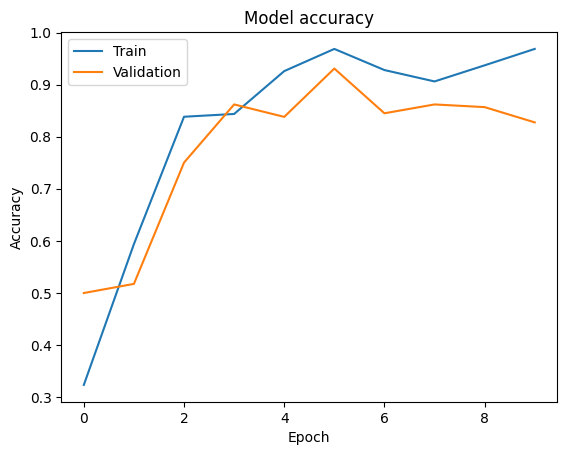

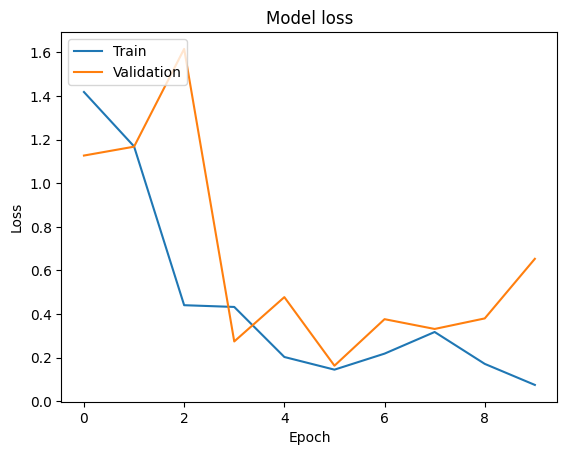

In [ ]:
base_model = Xception(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Step 5: Build custom model on top of pre-trained Xception
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(4, activation='softmax'))  # Assuming 3 classes for classification

# Step 6: Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 7: Train the model
epochs = 10
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size)

# Step 8: Evaluate model performance
test_loss, test_accuracy = model.evaluate(test_generator)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Step 9: Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Step 10: Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Step 8: Evaluate model performance and generate classification report

# Reset the test generator and ensure it has the correct batch size
test_generator.reset()

# Get the true labels
Y_true = test_generator.classes  # True labels

# Get predictions
Y_pred = model.predict(test_generator, steps=test_generator.samples // test_generator.batch_size + 1)

# Make sure the predictions are aligned with the number of samples
Y_pred_classes = np.argmax(Y_pred, axis=1)[:len(Y_true)]  # Truncate predictions to match true labels

# Generate class labels
class_labels = list(test_generator.class_indices.keys())

# Generate the classification report
report = classification_report(Y_true, Y_pred_classes, target_names=class_labels)

print("Classification Report:")
print(report)


480/480 ━━━━━━━━━━━━━━━━━━━━ 97s 202ms/step
Classification Report:
              precision    recall  f1-score   support

     HEATHLY       1.00      1.00      1.00      5117
         MLN       0.99      0.97      0.98      3980
       MSV_1       0.88      0.55      0.68      3157
       MSV_2       0.66      0.94      0.78      3095

    accuracy                           0.89     15349
   macro avg       0.89      0.86      0.86     15349
weighted avg       0.91      0.89      0.88     15349



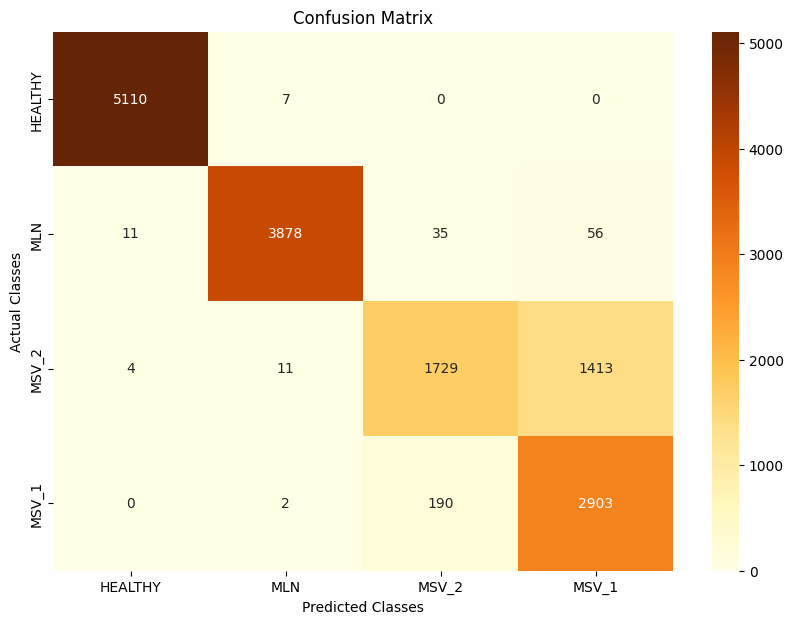

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(Y_true, Y_pred_classes)

# Define the names of the target classes
target_names = ['HEALTHY', 'MLN', 'MSV_2', 'MSV_1']

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlOrBr", xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix')
plt.ylabel('Actual Classes')
plt.xlabel('Predicted Classes')
plt.show()